In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import dtw, soft_dtw

In [12]:
# 可視化メソッド
def plot_result(X_train, y_train, best_ind, km_li, name):
    plt.figure(figsize=(12,5))

    # true
    plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name} True')

    # pred
    plt.subplot(1,2,2)
    best_k = best_ind + 1
    best_km = km_li[best_ind]
    y_pred = best_km.predict(X_train) + 1

    label = np.unique(y_pred)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_pred == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.1)
        plt.plot(best_km.cluster_centers_[class_label - 1], label=f'Class {class_label}',
                color=colors[class_label - 1], linewidth=3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.title(f'{name} Pred')
    plt.tight_layout()
    plt.show()

系列長を1/2にした

DBA k-means 1
	dist:  8.065616575412482
DBA k-means 2
	dist:  2.0837025505094537
DBA k-means 3
	dist:  0.8598673474346298
DBA k-means 4
	dist:  0.664606747890494
DBA k-means 5
	dist:  0.40049154344677196


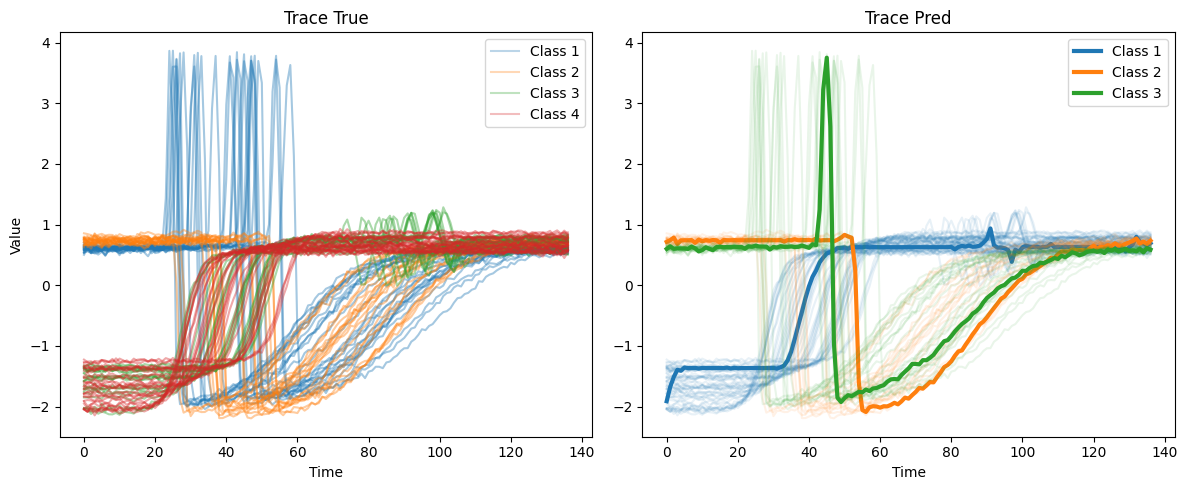

In [14]:
seed = 0
np.random.seed(seed)
name='Trace'
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset(name)
# Keep only 50 time series

# Make time series shorter
X_train = TimeSeriesResampler(sz=int(X_train.shape[1]/2)).fit_transform(X_train)
sz = X_train.shape[1]

# DBA-k-means
dist_li = []
km_li = []
for i in range(5):
    k_cluster = i+1

    print(f'DBA k-means {k_cluster}')
    dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                n_init=2,
                                metric="dtw",
                                verbose=False,
                                max_iter_barycenter=10,
                                random_state=seed)
    y_pred = dba_km.fit_predict(X_train)
    km_li.append(dba_km)
    dist_li.append(dba_km.inertia_)

    print('\tdist: ', dist_li[i])

dist_rate = [dist_li[i]/dist_li[i-1] for i in range(len(dist_li)) if i!=0]
best_ind = np.max([i for i, num in enumerate(dist_rate) if num < 0.5]) + 1

plot_result(X_train, y_train, best_ind, km_li, name)

DBA k-means 1
	dist:  1.6849363898489549
DBA k-means 2
	dist:  1.0106130875476897
DBA k-means 3
	dist:  0.8708670497838256
DBA k-means 4
	dist:  0.638070468588923
DBA k-means 5
	dist:  0.6040228515538142


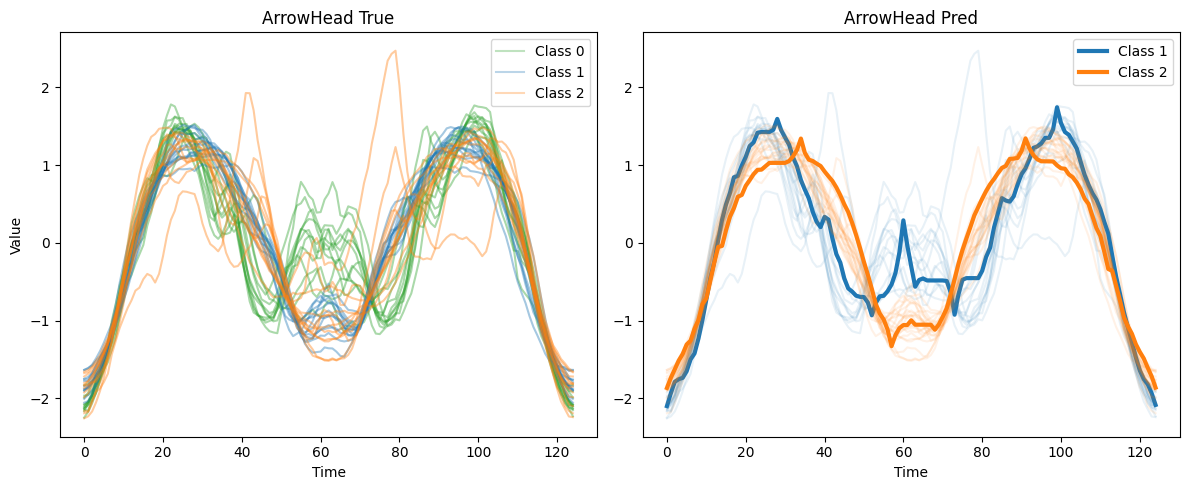

DBA k-means 1
	dist:  12.031234951320497
DBA k-means 2
	dist:  5.50726373424388
DBA k-means 3
	dist:  3.5650710432168795
DBA k-means 4
	dist:  1.913526845578686
DBA k-means 5
	dist:  1.467398275646685


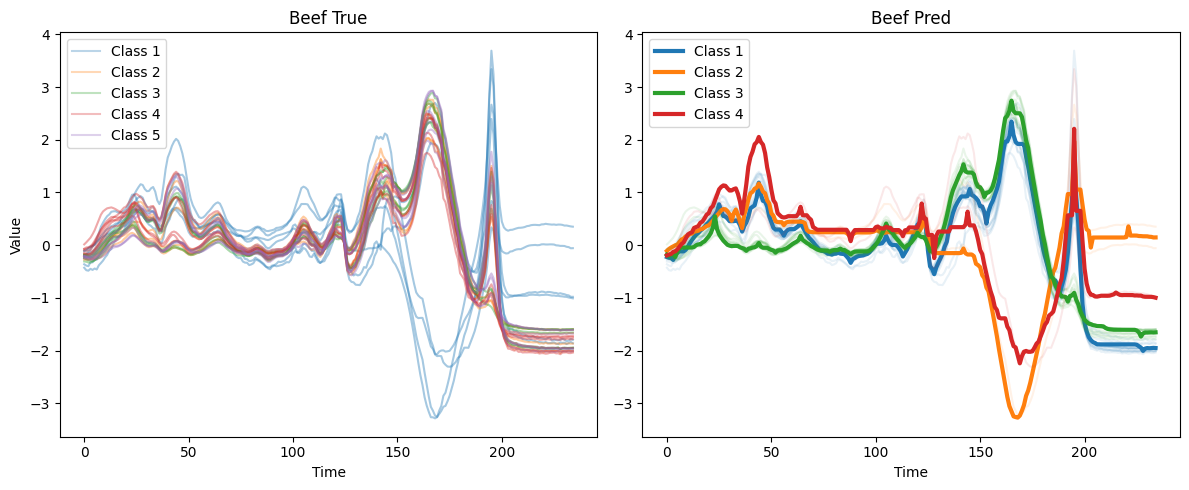

DBA k-means 1
	dist:  0.8689470710979772
DBA k-means 2
	dist:  0.5382657661853064
DBA k-means 3
	dist:  0.5044391973483905
DBA k-means 4
	dist:  0.4250903001009404
DBA k-means 5
	dist:  0.3901390044117711


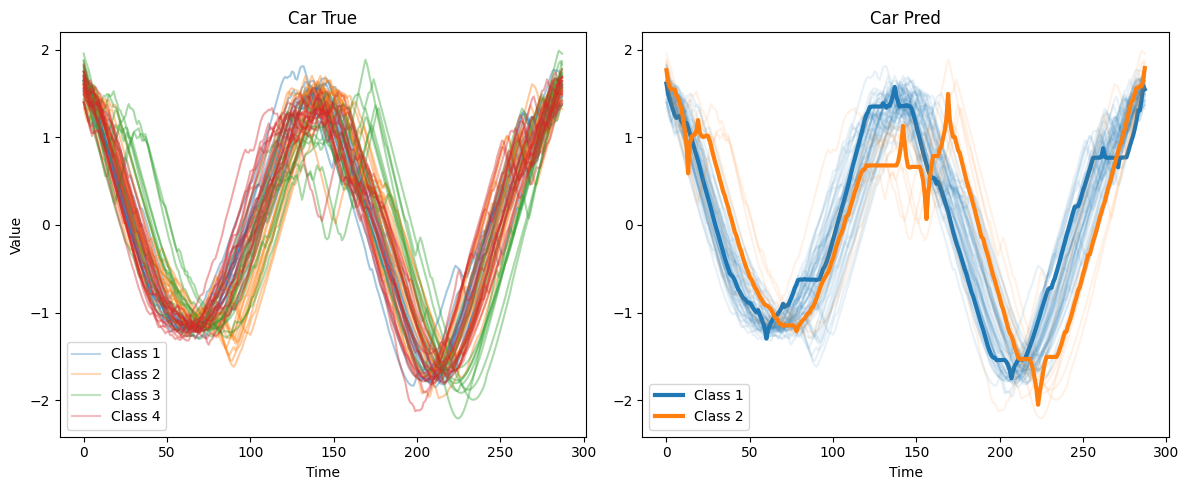

In [17]:
seed = 0
np.random.seed(seed)
name_li = [
            'ArrowHead','Beef','Car',
]

for name in name_li:
    X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(name)
    # Keep only 50 time series

    # Make time series shorter
    X_train = TimeSeriesResampler(sz=int(X_train.shape[1]/2)).fit_transform(X_train)
    sz = X_train.shape[1]

    # DBA-k-means
    dist_li = []
    km_li = []
    for i in range(5):
        k_cluster = i+1

        print(f'DBA k-means {k_cluster}')
        dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                    n_init=2,
                                    metric="dtw",
                                    verbose=False,
                                    max_iter_barycenter=10,
                                    random_state=seed)
        y_pred = dba_km.fit_predict(X_train)
        km_li.append(dba_km)
        dist_li.append(dba_km.inertia_)

        print('\tdist: ', dist_li[i])

    dist_rate = [dist_li[i]/dist_li[i-1] for i in range(len(dist_li)) if i!=0]
    best_ind = np.max([i for i, num in enumerate(dist_rate) if num < 0.7]) + 1

    plot_result(X_train, y_train, best_ind, km_li, name)